In [17]:
import numpy as np
import pandas as pd

import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.datasets import fetch_openml

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

y = y.astype(np.uint8)

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Look at some number

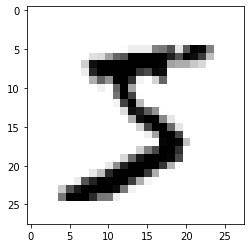

In [5]:
some_digit = X[0]
some_digit_img = some_digit.reshape(28,28)

plt.imshow(some_digit_img, cmap = "binary")
plt.show()

## SGD classifier to classsify 5s

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state = 42)

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [7]:
dummy_clf = DummyClassifier(strategy="constant", constant=0)
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [8]:
sgd_y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [9]:
sgd_prec, sgd_rec, sgd_thresh = precision_recall_curve(y_train_5, sgd_y_scores)

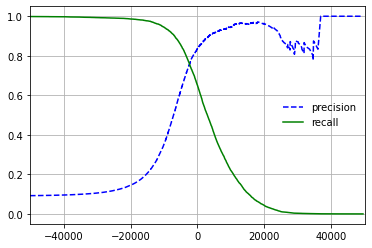

In [10]:
fig, ax = plt.subplots()

ax.plot(sgd_thresh, sgd_prec[:-1], color="b", linestyle="--", label="precision")
ax.plot(sgd_thresh, sgd_rec[:-1], color="g", linestyle="-", label="recall")
ax.set_xlim((-50000,50000))
ax.grid()

plt.legend(frameon = False)
plt.show()

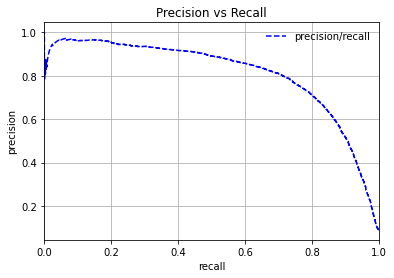

In [11]:
fig, ax = plt.subplots()

ax.plot(sgd_rec[:-1], sgd_prec[:-1], color="b", linestyle="--", label="precision/recall")
ax.set_xlim((0,1))
ax.set_xlabel("recall")
ax.set_ylabel("precision")
ax.set_title("Precision vs Recall")
ax.grid()

plt.legend(frameon = False)
plt.show()

## Compare SGD with Radom Forest

In [35]:
rf_clf = RandomForestClassifier(random_state=42)
rf_y_scores = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [38]:
sgd_prec, sgd_rec, sgd_thresh = roc_curve(y_train_5, sgd_y_scores)
rf_prec, rf_rec, rf_thresh = roc_curve(y_train_5, rf_y_scores[:,1])

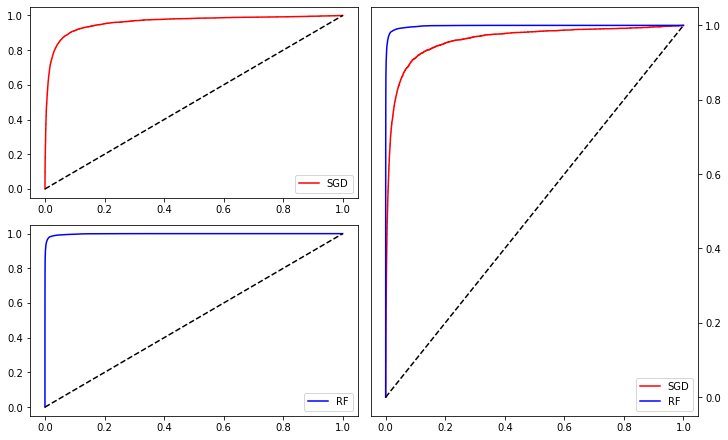

In [51]:
fig = plt.figure(constrained_layout=True, figsize=(10,6))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

ax1.plot(sgd_prec, sgd_rec, color="r", label="SGD")

ax2.plot(rf_prec, rf_rec, color="b", label="RF")

ax3.plot(sgd_prec, sgd_rec, color="r", label="SGD")
ax3.plot(rf_prec, rf_rec, color="b", label="RF")
ax3.yaxis.tick_right()

for ax in (ax1, ax2, ax3):
    ax.plot([0,1],[0,1], linestyle="--", color="k")
    ax.legend()

plt.show()